In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
from MSM_util import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import sys, scipy, numpy

# print(scipy.__version__, numpy.__version__, sys.version_info)

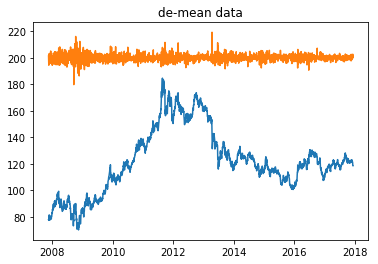

In [2]:
xls_data = pd.read_excel('data_GVZ_GLD.xlsx')
date_GLD = xls_data.iloc[:,3]
GLD = xls_data.loc[:,'GLD']

GLD2 = GLD.shift(1)
GLD2[0] = GLD[0]
GLD_r = GLD/GLD2

GLD_d = GLD_r - np.mean(GLD_r)
plt.plot(date_GLD,GLD)
plt.title('de-mean data')
plt.plot(date_GLD,200*GLD_r)

data = GLD_d[::-1]


kbar = 5
startingvals = []#[1.2, 1.2, 0.5 , 1.2 ]
LB = [1, 1, 0.001, 0.0001]
UB = [1.99, 50, 0.99999, 5]
op_methods = 'slsqp'
plt.show()

In [3]:
m = 20
output = df()
output["RV"] = []
output["m0"] = []
output["b"] = []
output["gamma_k"]=[]
output["sigma"] = []

for i in range(0,m):
    data2 = data[i:len(data)-m+i]
    result = MSM_fitdata(data2, kbar, LB ,UB,op_methods, startingvals)
    re2 = MSM_likelihood_new(result.params,  kbar, data2, 20)
    output.loc[i,"RV"] = sum(re2)**2
    for element in result.params:
        output.loc[i,element] = result.params[element].value
    

No starting values entered: Using grid-search
LL = -7829.3369
==========init params=========
m0 =   1.3377
b =   1.5000
gamma_k =   0.1000
sigma =   0.1934


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4127
b =  16.0251
gamma_k =   1.0000
sigma =   0.2493
LLs = -7858.8924
AIC =  25.9388
BIC =  17.9388
No starting values entered: Using grid-search
LL = -7830.2668
==========init params=========
m0 =   1.3380
b =   1.5000
gamma_k =   0.1000
sigma =   0.1934


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4132
b =  16.0614
gamma_k =   1.0000
sigma =   0.2494
LLs = -7859.8734
AIC =  25.9391
BIC =  17.9391
No starting values entered: Using grid-search
LL = -7833.1627
==========init params=========
m0 =   1.3382
b =   1.5000
gamma_k =   0.1000
sigma =   0.1932


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4672
b =  19.3545
gamma_k =   0.9465
sigma =   0.2074
LLs = -7855.7947
AIC =  25.9380
BIC =  17.9380
No s

# Forecast result

In [6]:
output

,RV,m0,b,gamma_k,sigma
0,31.405492,1.412725,16.025134,0.999990,0.249273
1,31.418479,1.413180,16.061389,0.999990,0.249376
2,26.133106,1.467222,19.354476,0.946516,0.207425
3,31.415924,1.414015,16.032815,0.999990,0.249356
4,31.420294,1.414701,15.947028,0.999990,0.249391
5,26.142858,1.467383,19.334091,0.945286,0.207502
6,31.448377,1.413645,15.929267,0.999990,0.249614
7,31.455272,1.413970,15.972971,0.999990,0.249668
8,27.850278,1.471446,26.815586,0.920335,0.221055
9,27.862207,1.471848,26.963889,0.920440,0.221149


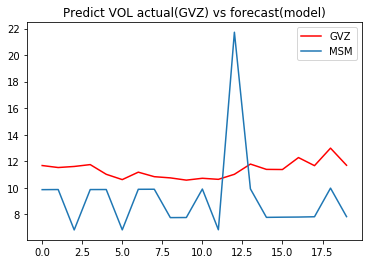

In [23]:
GVZ = xls_data['GVZ']
GVZ_lastm = GVZ[::-1]
GVZ_lastm = GVZ_lastm.iloc[-m:]
actual = plt.plot(range(0,m),GVZ_lastm, label='GVZ', color = 'red')
model = plt.plot(range(0,m),(output['RV']/100)**2*100, label = 'MSM')

plt.title('Predict VOL actual(GVZ) vs forecast(model)')
plt.legend()
plt.show()

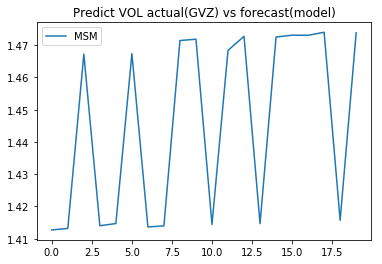

In [22]:
model = plt.plot(range(0,m),output['m0'], label = 'MSM')

plt.title('Predict VOL actual(GVZ) vs forecast(model)')
plt.legend()
plt.show()

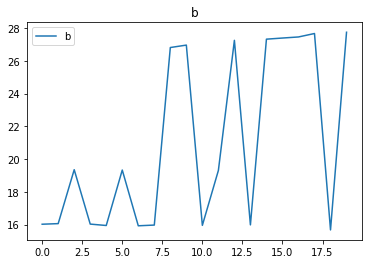

In [21]:
model = plt.plot(range(0,m),output['b'], label = 'b')

plt.title('b')
plt.legend()
plt.show()

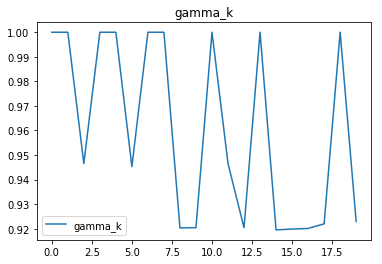

In [20]:
model = plt.plot(range(0,m),output['gamma_k'], label = 'gamma_k')

plt.title('gamma_k')
plt.legend()
plt.show()

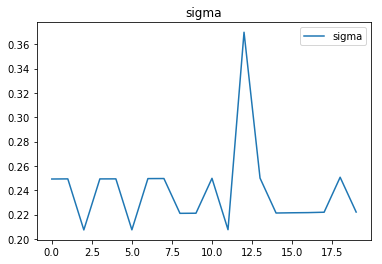

In [19]:
model = plt.plot(range(0,m),output['sigma'], label = 'sigma')

plt.title('sigma')
plt.legend()
plt.show()